# Creating Ranom Patterns for Waveguides

### Random Vertex Approach
Idea: pick random points for vertices of shape, smooth shape

Pros: Very simple to implement

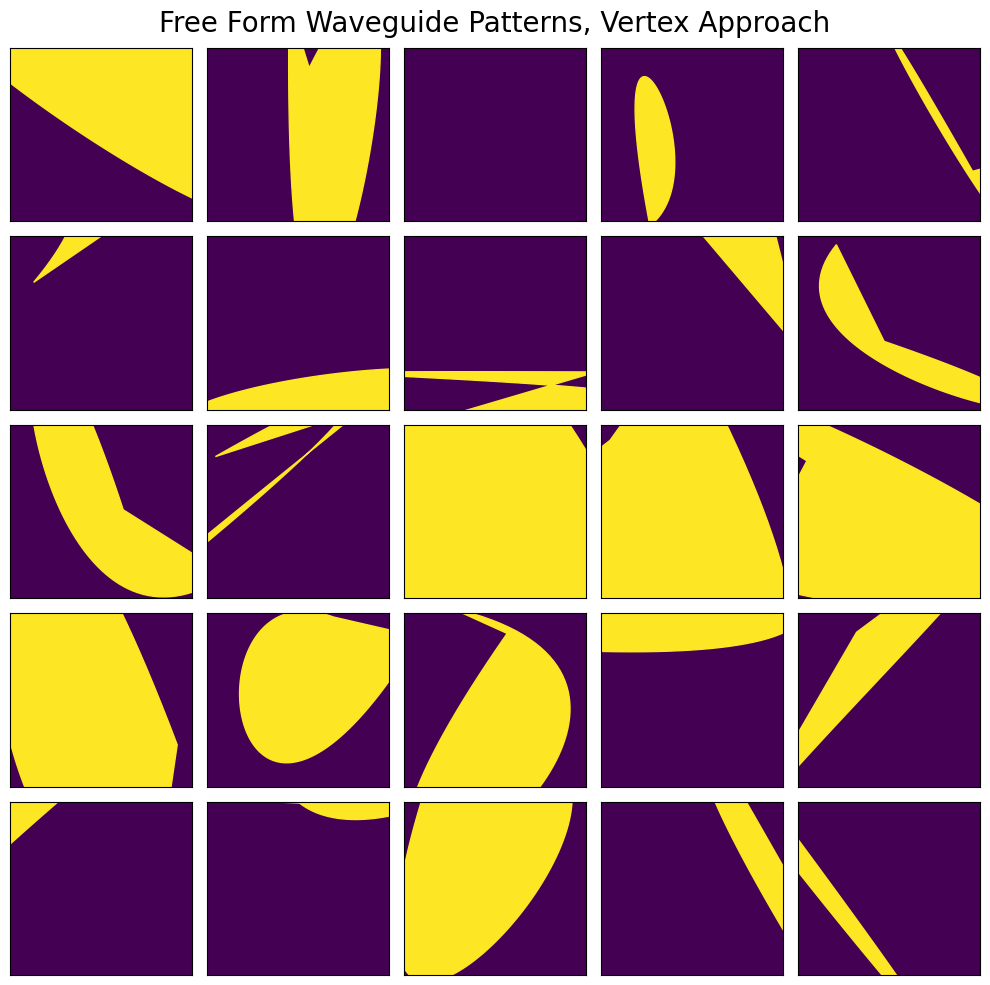

In [235]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.interpolate import splprep, splev

# Function to generate random shape
def generate_random_shape(square_size, num_vertices):
    # Generate random vertices within the square
    vertices = [(random.uniform(-square_size*.5, square_size*1.5), random.uniform(-square_size*.5, square_size*1.5)) for i in range(num_vertices)]
    return vertices

# Function to smooth the shape using splines
def smooth_shape(vertices, smoothing_factor=0.5):
    x, y = zip(*vertices)
    tck, u = splprep([x, y], s=smoothing_factor)
    new_points = splev(np.linspace(0, 1, 100), tck)
    smoothed_vertices = list(zip(new_points[0], new_points[1]))
    return smoothed_vertices

# Function to plot the shape
def plot_shape(vertices, title='Random Shape', v_on=True):
    # Close the shape by appending the first vertex at the end
    vertices.append(vertices[0])
    x, y = zip(*vertices)
    if v_on:
        plt.plot(x, y, marker='o', label='Original Shape')
    plt.fill(x,y,color='yellow')


# Function to generate and plot multiple shapes
def plot_multiple_shapes(num_shapes, square_size, num_vertices, smoothing_factor=0.5, num_plots=1):
    # plt.figure(figsize=(5, 5))
    fig, axes = plt.subplots(nrows=num_plots, ncols=num_plots, figsize=(10, 10))
    fig.suptitle("Free Form Waveguide Patterns, Vertex Approach",size=20)
    for l in range(num_plots):
        for m in range(num_plots):
            axes[l,m].set_facecolor('#440154FF')
            axes[l,m].set_xlim(0,square_size)
            axes[l,m].set_ylim(0,square_size)
            axes[l, m].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
            for n in range(num_shapes):
                vertices = smooth_shape(generate_random_shape(square_size, num_vertices), smoothing_factor)
                x,y = zip(*vertices)
                axes[l,m].fill(x,y,color='#FDE725FF')
    plt.tight_layout()
    plt.show()

plot_multiple_shapes(1,10,4,num_plots=5)




### Grid-Smoothing Approach
Basic Idea: Set grid of points, smooth and cluster the group

Pros: Ideally more realistic for fabrication, avoid sharp points of random vertices

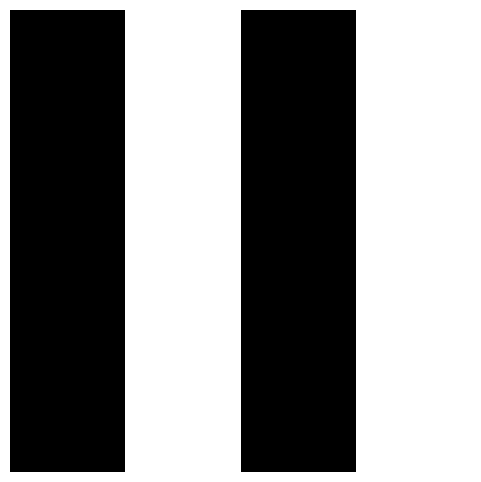

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def generate_quadrant(grid_size=10, fill_prob=0.3, blur_sigma=1.0, rsteps=0):
    """Generate a random quadrant shape with smoothing."""
    quadrant = np.random.rand(grid_size, grid_size) < fill_prob
    smoothed = gaussian_filter(quadrant.astype(float), sigma=blur_sigma)
    output = smoothed > 0.5
    # Filters for null shapes
    if any(True in sublist for sublist in output):
        return output
    if rsteps >= 5:
        return output
    return generate_quadrant(grid_size, fill_prob, blur_sigma, rsteps+1)

def mirror_quadrant(quadrant):
    """Reflect quadrant across x and y axes to create symmetry."""
    top_half = np.concatenate((np.flip(quadrant, axis=1), quadrant), axis=1)
    full_shape = np.concatenate((np.flip(top_half, axis=0), top_half), axis=0)
    return full_shape

def plot_shape(shape_matrix):
    """Plot the generated shape."""
    plt.figure(figsize=(6, 6))
    plt.imshow(shape_matrix, cmap='gray', origin='upper')
    plt.axis('off')
    plt.show()

def generate_symmetrical_shape(grid_size=10, fill_prob=0.3, blur_sigma=1.0):
    """Generate and display a symmetrical shape."""
    quadrant = generate_quadrant(grid_size, fill_prob, blur_sigma)
    symmetrical_shape = mirror_quadrant(quadrant)
    plot_shape(symmetrical_shape)

def plot_multiple_shapes(grid_size=10, fill_prob=.3, blur_sigma=1.0, num_plots=1):
    fig, axes = plt.subplots(nrows=num_plots, ncols=num_plots, figsize=(10, 10))
    fig.suptitle('x-y Symmetrical Waveguide Patterns, Grid+Gaussian Filter Approach', size=20)
    for l in range(num_plots):
        for m in range(num_plots):
            axes[l,m].set_facecolor('#301934')
            axes[l, m].tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
            quadrant = generate_quadrant(grid_size, fill_prob, blur_sigma)
            symmetrical_shape = mirror_quadrant(quadrant)
            axes[l,m].imshow(symmetrical_shape,cmap="viridis", origin='upper')
    plt.tight_layout()
    plt.show()

# plot_multiple_shapes(10, .5, 1.2, 5)
x = [[0,1,0,1], [0,1,0,1], [0,1,0,1], [0,1,0,1]]
plot_shape(x)
# generate_symmetrical_shape(grid_size=10, fill_prob=.4, blur_sigma=1.7)
# Make them not touch boundaries